# PCA Assignment
## Wine data
Perform Principal component analysis and perform clustering using first 3 principal component scores both heirarchial and k mean clustering(scree plot or elbow curve) and obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='ticks',palette='crest')

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans

In [52]:
rawdata = pd.read_csv('wine.csv')

### Data Exploration

In [53]:
rawdata.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [54]:
rawdata.shape

(178, 14)

Checking null values

In [55]:
rawdata.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

Checking any duplicate record present

In [56]:
rawdata.duplicated().sum()

0

Dropping **Type** column, cause it is basically the target column\
Creating new dataframes to store labels of clustering and to compare with original **Type**.

In [57]:
data = rawdata.drop('Type',axis=1)
results = pd.DataFrame({'Original Type':rawdata['Type'].values})
results_pca = pd.DataFrame({'Original Type':rawdata['Type'].values})

It is good to give normal scaled data to clustering algorithms

In [58]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data),columns=data.columns)

### Data Visualization

Contribution of all three types in our dataset

[Text(0, 0, '59'), Text(0, 0, '71'), Text(0, 0, '48')]

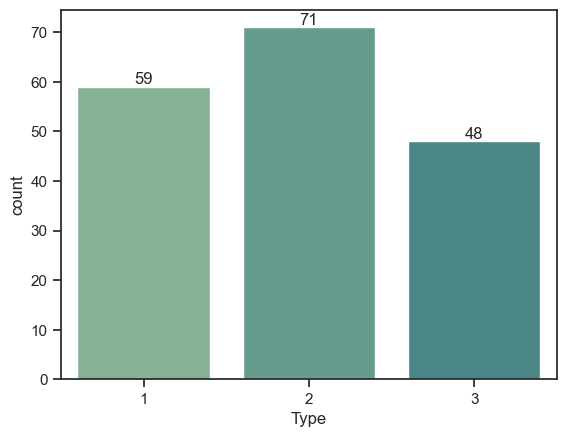

In [59]:
ax = sns.countplot(data=rawdata, x='Type')
ax.bar_label(ax.containers[0])

Checking any extreme outliers present in data or not

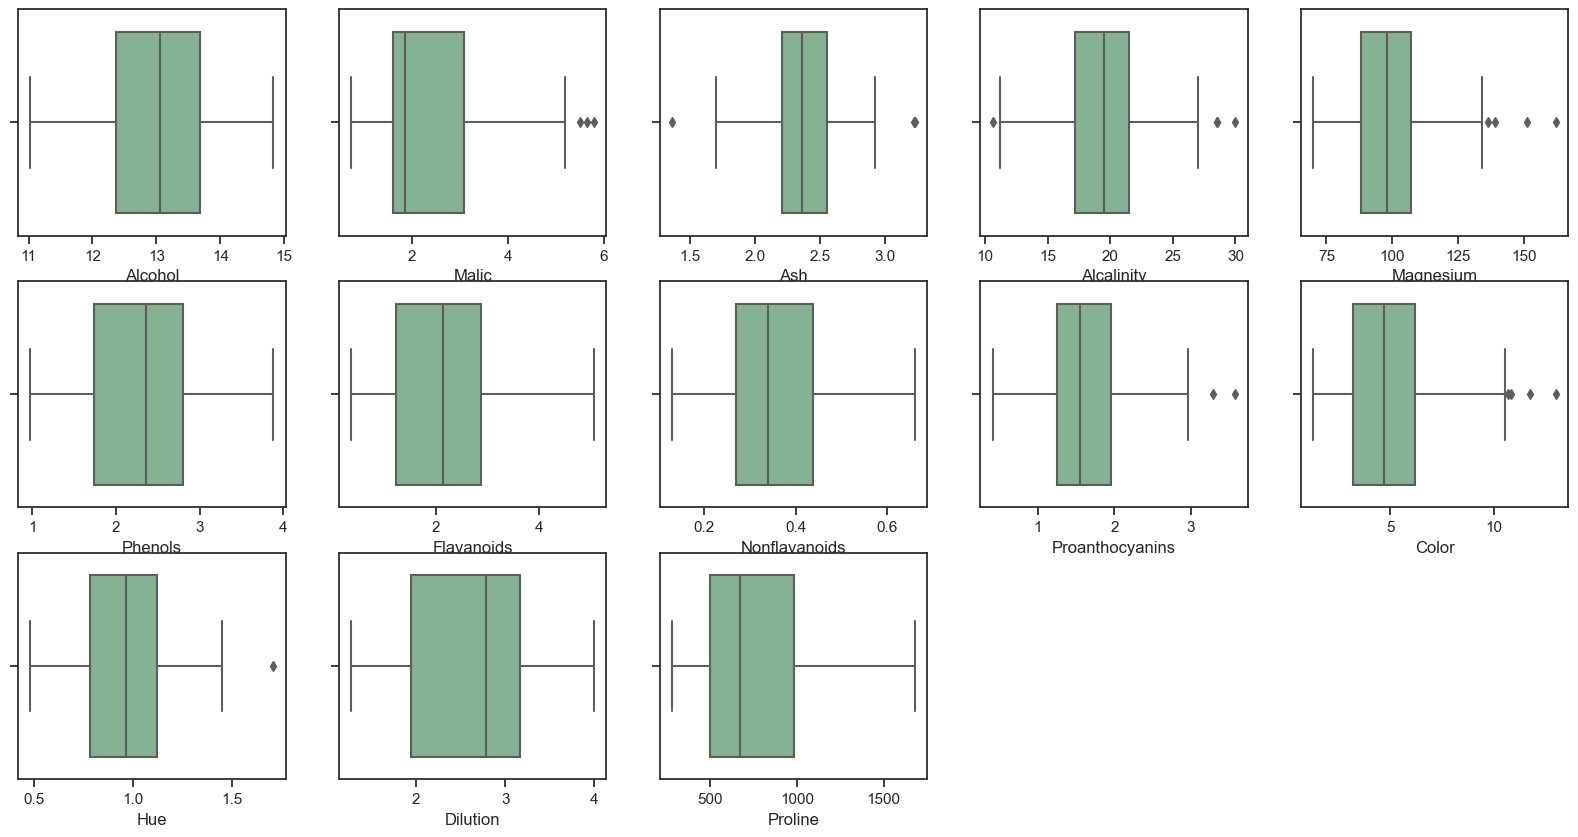

In [60]:
plt.figure(figsize=(20,10))
for i in range(len(data.columns)):
    plt.subplot(3,5,i+1)
    sns.boxplot(data=rawdata, x=data.columns[i])

Density plot of every variable againts their type

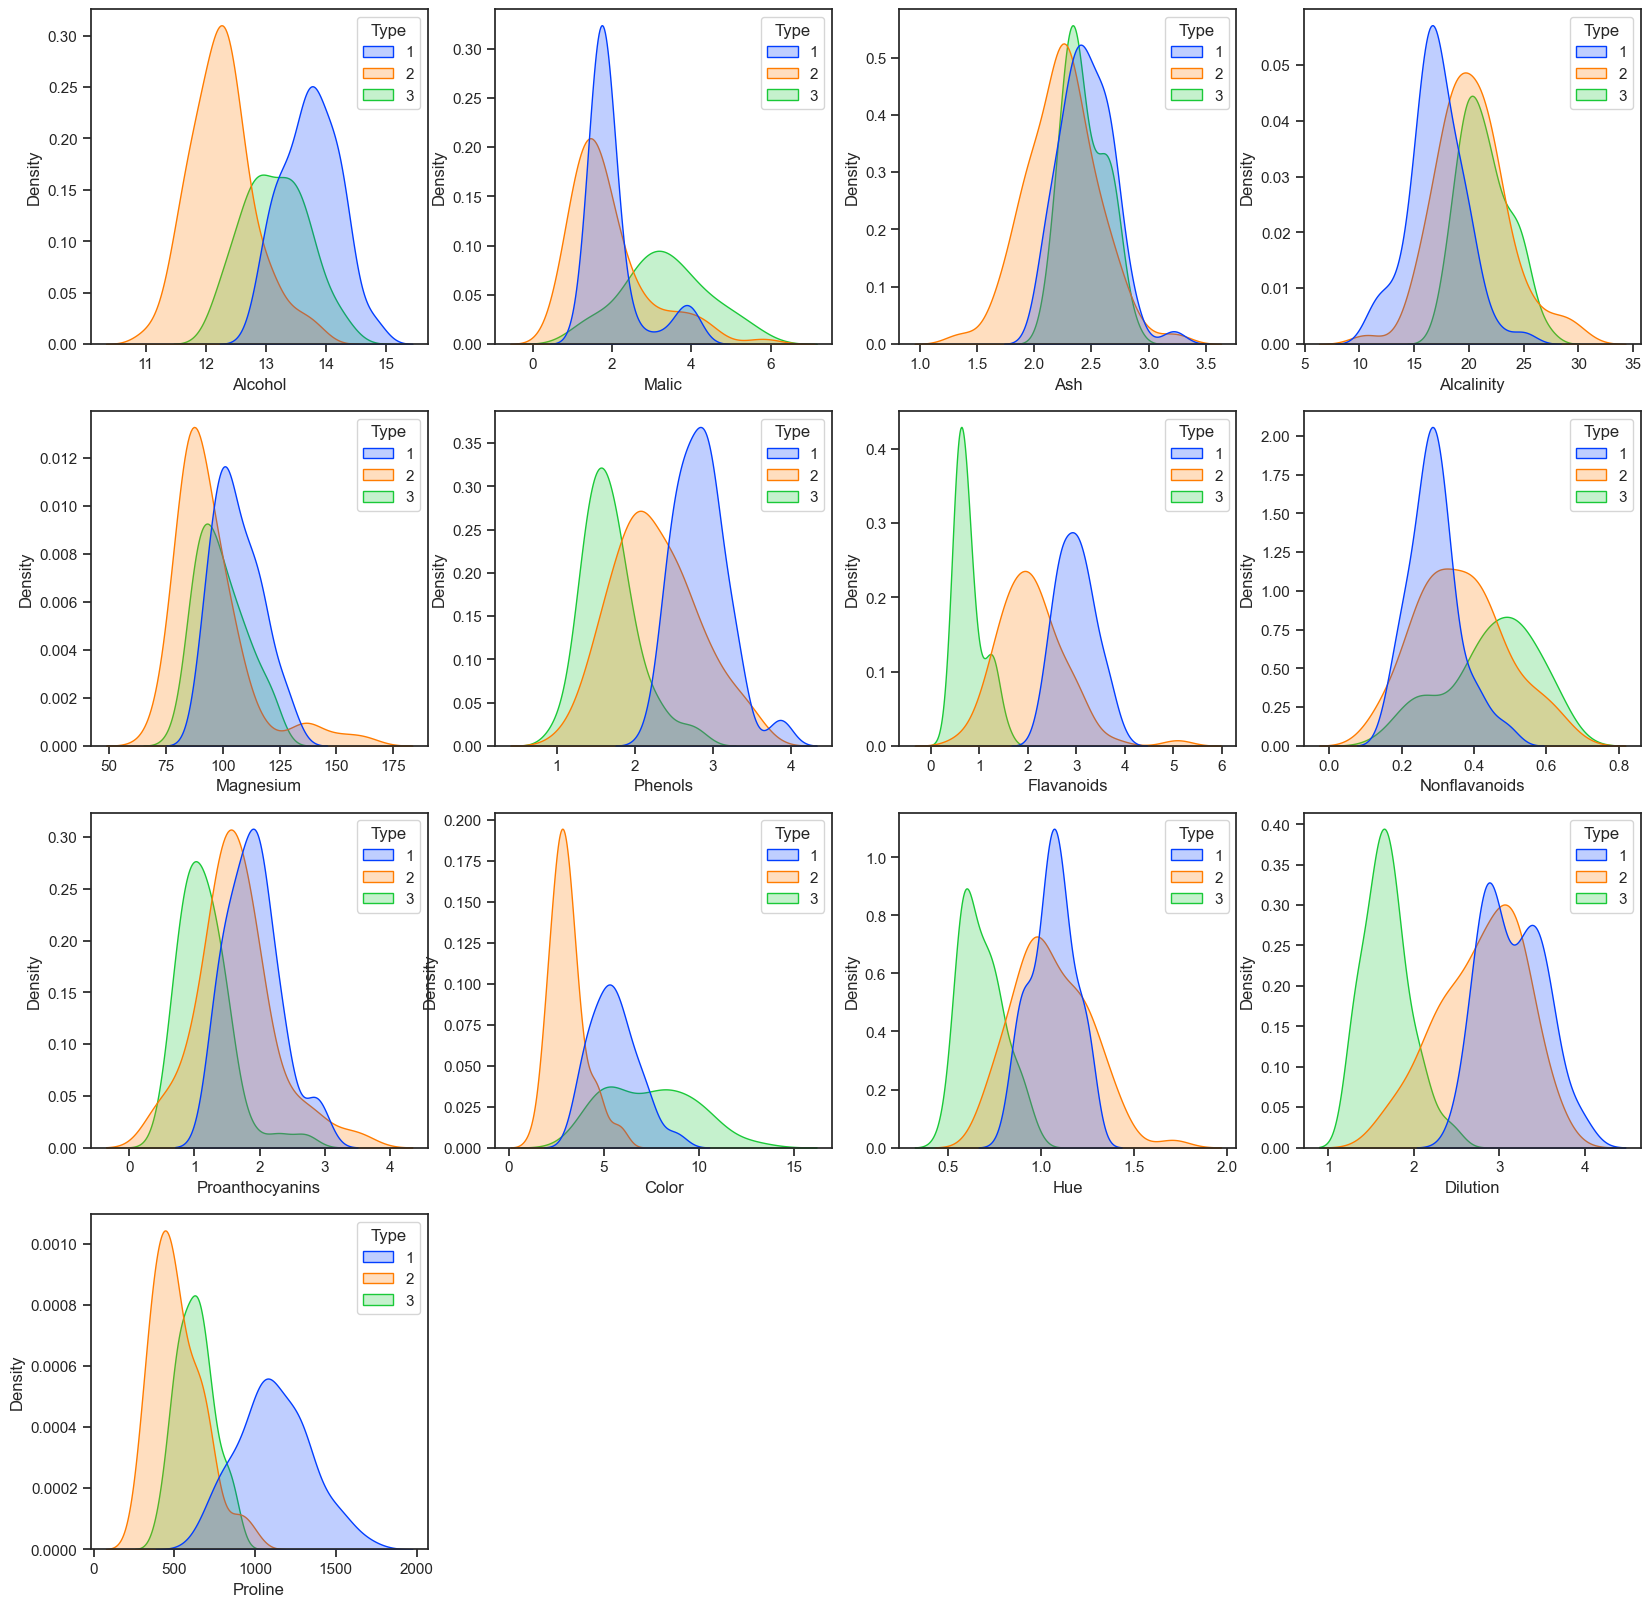

In [61]:
plt.figure(figsize=(20,20))
for i in range(len(data.columns)):
    plt.subplot(4,4,i+1)
    sns.kdeplot(data=rawdata, x=data.columns[i], hue='Type',fill=True,palette='bright')

Looking for correlation between variables

<Axes: >

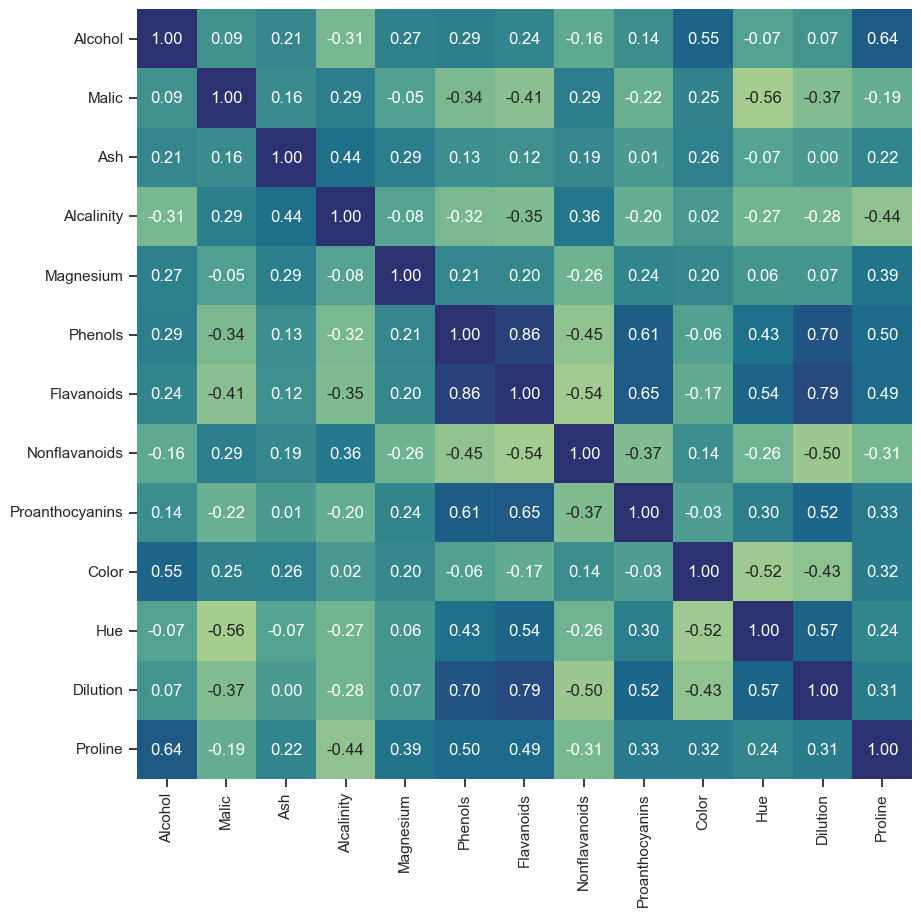

In [62]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.2f',cbar=False,cmap='crest')

## PCA

In [63]:
pca = PCA()
pca_values = pca.fit_transform(data)

Variances and cumulative variance

In [64]:
eigenvalues = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(eigenvalues)

In [65]:
eigenvalues

array([9.98091230e-01, 1.73591562e-03, 9.49589576e-05, 5.02173562e-05,
       1.23636847e-05, 8.46213034e-06, 2.80681456e-06, 1.52308053e-06,
       1.12783044e-06, 7.21415811e-07, 3.78060267e-07, 2.12013755e-07,
       8.25392788e-08])

Text(0.5, 1.0, 'Scree Plot')

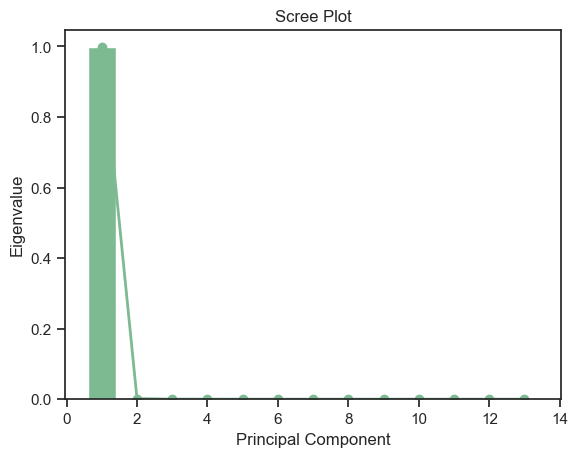

In [66]:
plt.plot(np.arange(1, len(eigenvalues)+1), eigenvalues, 'o-', linewidth=2)
plt.bar(np.arange(1, len(eigenvalues)+1), eigenvalues)
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')

We can see first PCA component has very significant contribution

Text(0.5, 1.0, 'Cumulative Variance Explained Plot')

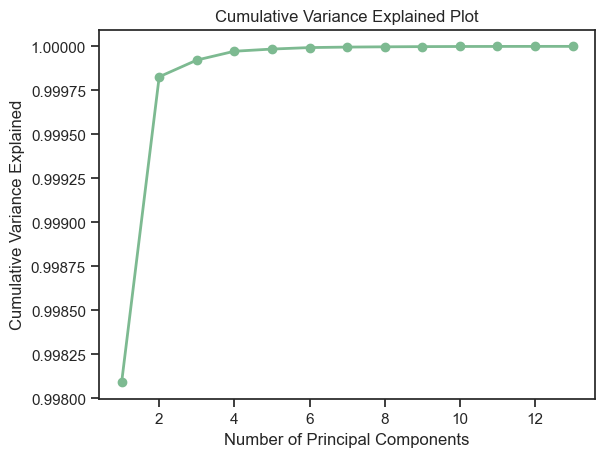

In [67]:
plt.plot(np.arange(1, len(cumulative_variance)+1), cumulative_variance, 'o-', linewidth=2)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained Plot')

Taking first 3 components of PCA as per stated in problem

In [68]:
pca_data = pd.DataFrame(pca_values[:,:3], columns=['pca1','pca2','pca3'])

## Clustering with original scaled data

### Hierarchical clustering

We will be checking our Agglomerative clustering with all four types of linkage
- single
- complete
- average
- ward

Text(0.5, 1.0, 'Dendrogram (truncated) - Ward Linkage')

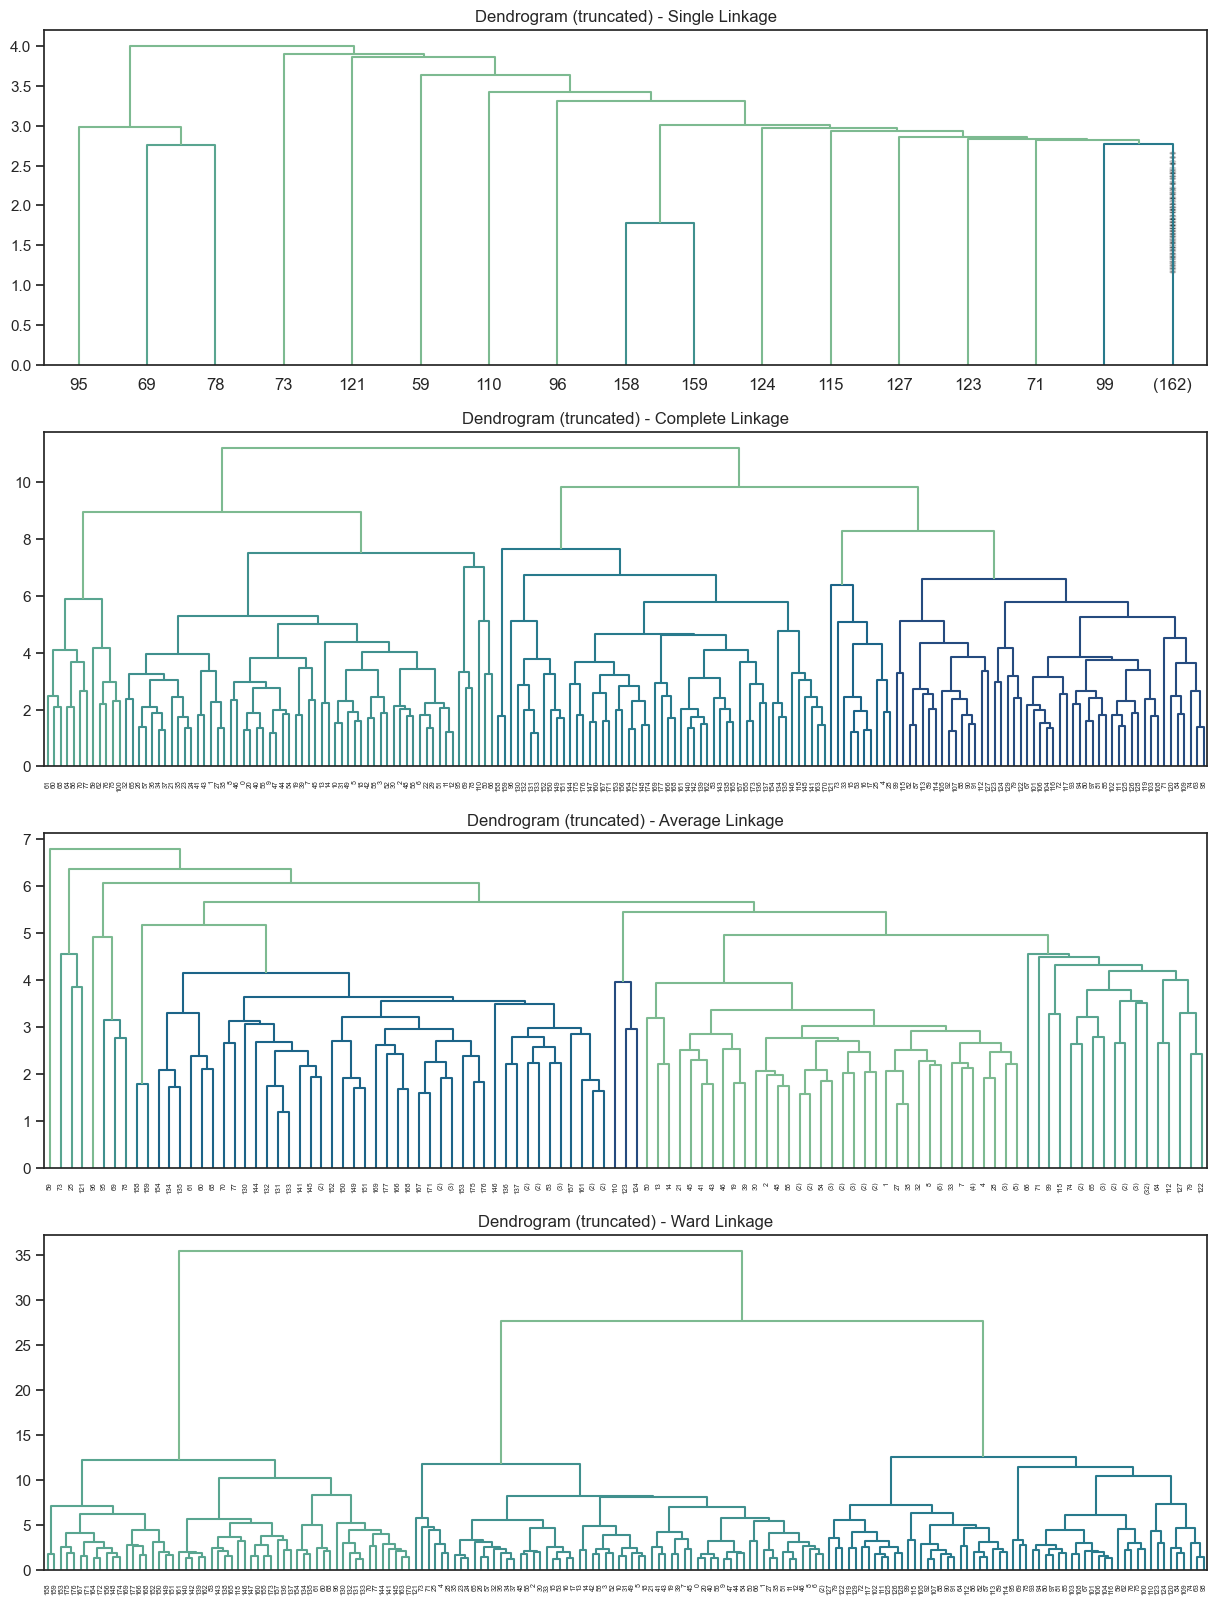

In [69]:
Z_single = sch.linkage(scaled_data, method='single')
Z_complete = sch.linkage(scaled_data, method='complete')
Z_average = sch.linkage(scaled_data, method='average')
Z_ward = sch.linkage(scaled_data, method='ward')

plt.figure(figsize=(15,20))
plt.subplot(4,1,1)
dendrogram = sch.dendrogram(Z_single,p=12,truncate_mode='level',show_contracted=True)
plt.title('Dendrogram (truncated) - Single Linkage')
plt.subplot(4,1,2)
dendrogram = sch.dendrogram(Z_complete,p=12,truncate_mode='level',show_contracted=True)
plt.title('Dendrogram (truncated) - Complete Linkage')
plt.subplot(4,1,3)
dendrogram = sch.dendrogram(Z_average,p=12,truncate_mode='level',show_contracted=True)
plt.title('Dendrogram (truncated) - Average Linkage')
plt.subplot(4,1,4)
dendrogram = sch.dendrogram(Z_ward,p=12,truncate_mode='level',show_contracted=True)
plt.title('Dendrogram (truncated) - Ward Linkage')

From the dendrograms we can clearly take 3 clusters for any linkage model

Agglomerative clustering with every linkage. Storing labels in *results* dataframe.

In [70]:
hc_single = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='single')
y_hc_single = hc_single.fit_predict(scaled_data)
results['hc_single'] = y_hc_single

hc_complete = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='complete')
y_hc_complete = hc_complete.fit_predict(scaled_data)
results['hc_complete'] = y_hc_complete

hc_average = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='average')
y_hc_average = hc_average.fit_predict(scaled_data)
results['hc_average'] = y_hc_average

hc_ward = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc_ward = hc_ward.fit_predict(scaled_data)
results['hc_ward'] = y_hc_ward

### KMeans clustering

Using elbow method to find optimal number of clusters

Text(0, 0.5, 'WCSS')

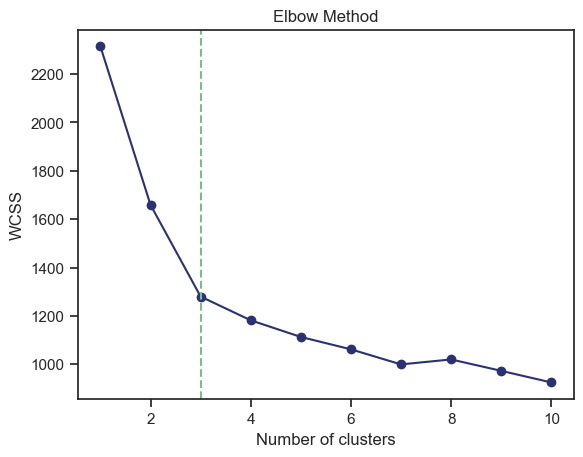

In [71]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0, n_init='auto')
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss,marker='o',color='#2c3172')
plt.axvline(x=3,color='#7dba91',linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

From the plot we can safely take k=3

In [72]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init='auto', random_state=0)
y_kmean = kmeans.fit_predict(scaled_data)

results['kmean'] = y_kmean

#### Distributions of labels from all clustering models

<Axes: xlabel='variable', ylabel='count'>

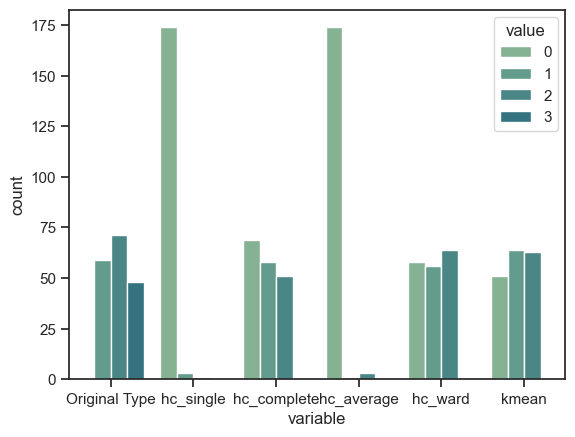

In [73]:
sns.countplot(data=results.melt(),x='variable',hue='value')

## Clustering with PCA data
Following the same steps as above but with PCA data

### Hierarchical clustering

Text(0.5, 1.0, 'Dendrogram (truncated) - Ward Linkage')

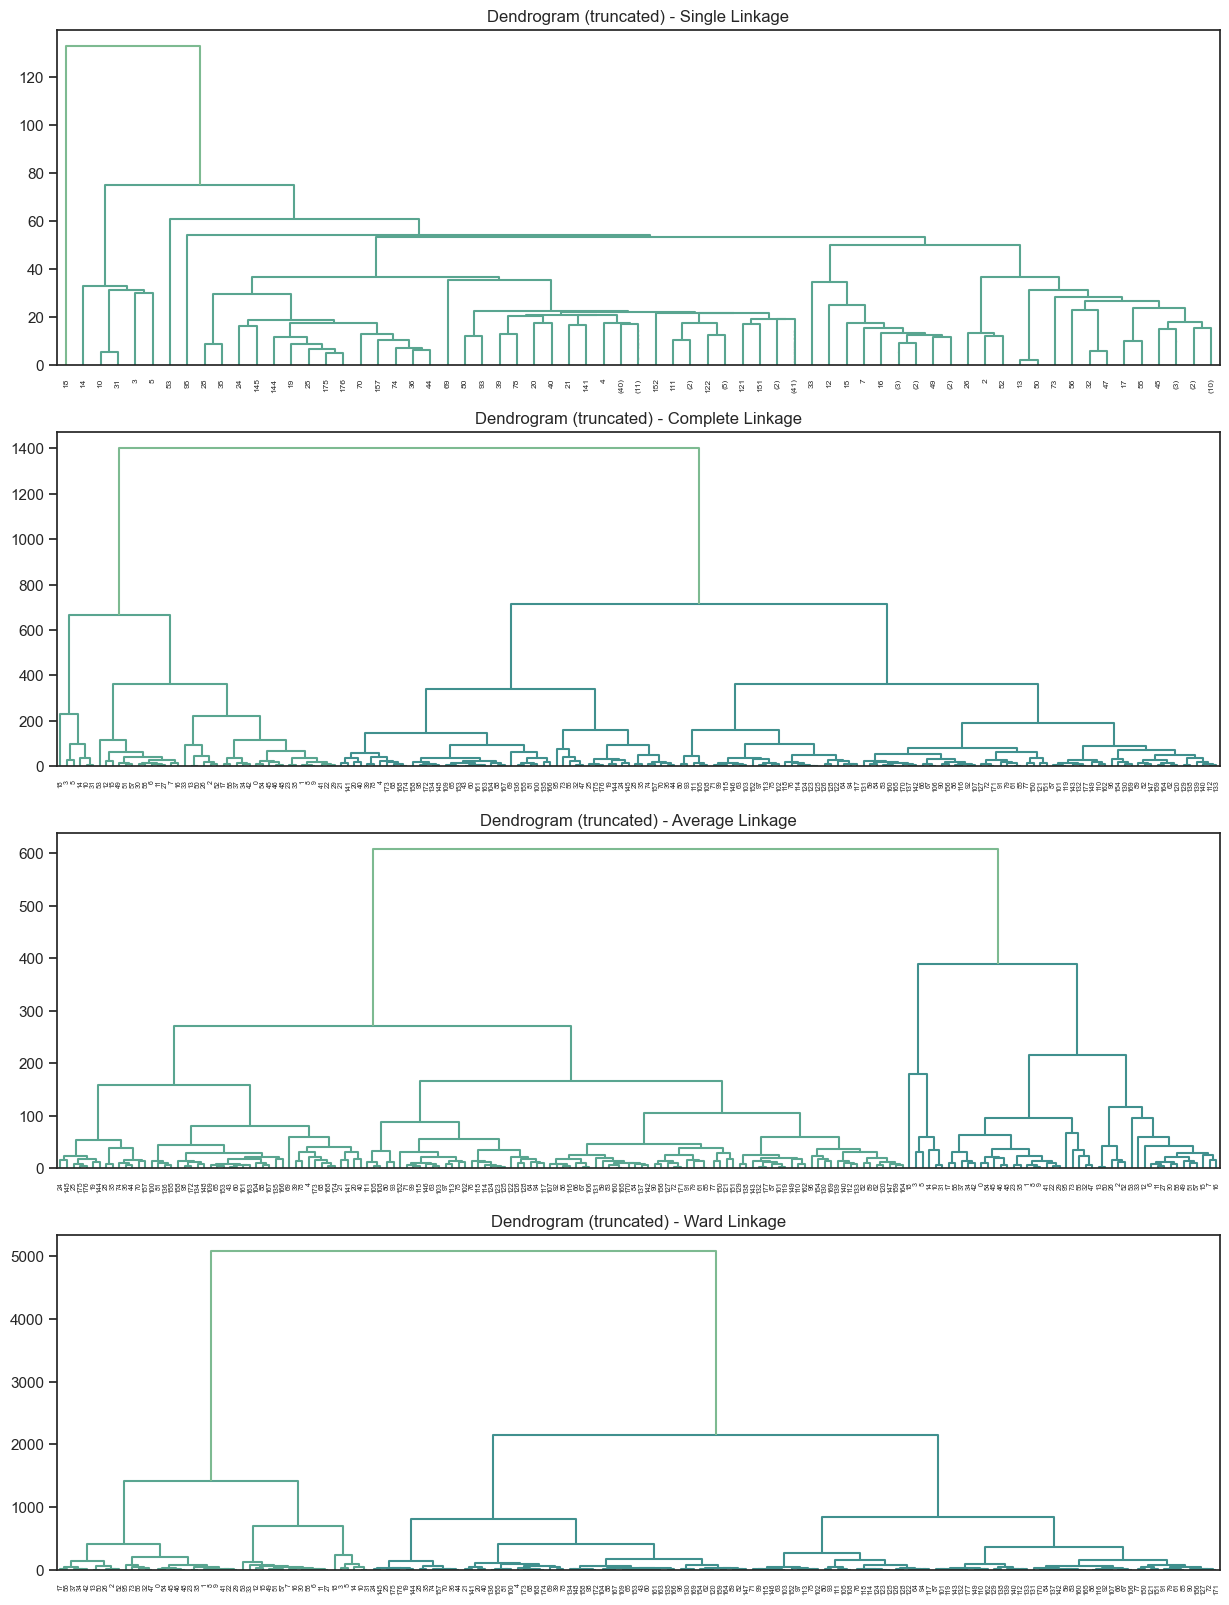

In [74]:
Z_single = sch.linkage(pca_data, method='single')
Z_complete = sch.linkage(pca_data, method='complete')
Z_average = sch.linkage(pca_data, method='average')
Z_ward = sch.linkage(pca_data, method='ward')

plt.figure(figsize=(15,20))
plt.subplot(4,1,1)
dendrogram = sch.dendrogram(Z_single,p=12,truncate_mode='level',show_contracted=True)
plt.title('Dendrogram (truncated) - Single Linkage')
plt.subplot(4,1,2)
dendrogram = sch.dendrogram(Z_complete,p=12,truncate_mode='level',show_contracted=True)
plt.title('Dendrogram (truncated) - Complete Linkage')
plt.subplot(4,1,3)
dendrogram = sch.dendrogram(Z_average,p=12,truncate_mode='level',show_contracted=True)
plt.title('Dendrogram (truncated) - Average Linkage')
plt.subplot(4,1,4)
dendrogram = sch.dendrogram(Z_ward,p=12,truncate_mode='level',show_contracted=True)
plt.title('Dendrogram (truncated) - Ward Linkage')

In [75]:
hc_single = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='single')
y_hc_single = hc_single.fit_predict(pca_data)
results_pca['hc_single'] = y_hc_single

hc_complete = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='complete')
y_hc_complete = hc_complete.fit_predict(pca_data)
results_pca['hc_complete'] = y_hc_complete

hc_average = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='average')
y_hc_average = hc_average.fit_predict(pca_data)
results_pca['hc_average'] = y_hc_average

hc_ward = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc_ward = hc_ward.fit_predict(pca_data)
results_pca['hc_ward'] = y_hc_ward

### KMeans clustering

Text(0, 0.5, 'WCSS')

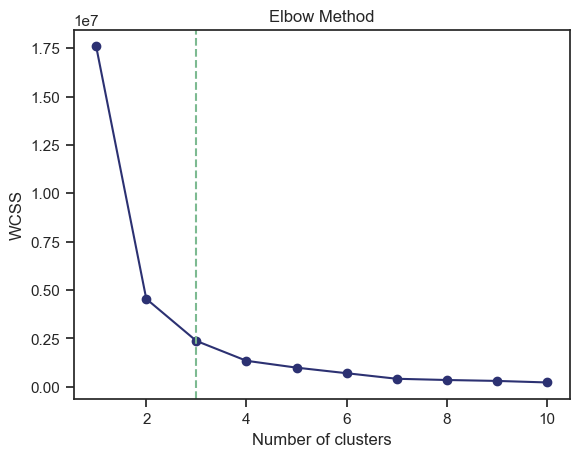

In [76]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0, n_init='auto')
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss,marker='o',color='#2c3172')
plt.axvline(x=3,color='#7dba91',linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [77]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init='auto', random_state=0)
y_kmean = kmeans.fit_predict(scaled_data)

results_pca['kmean'] = y_kmean

<Axes: xlabel='variable', ylabel='count'>

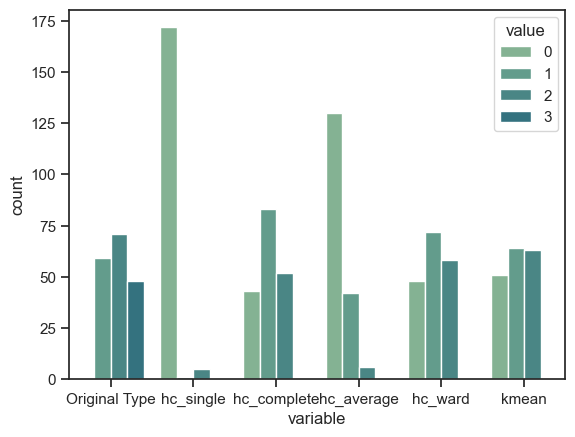

In [78]:
sns.countplot(data=results_pca.melt(),x='variable',hue='value')

## Summary

By looking at the correlation between the labels we can understand which models correctly clustered the data

Text(0.5, 0.98, 'Correlation betweem clusters')

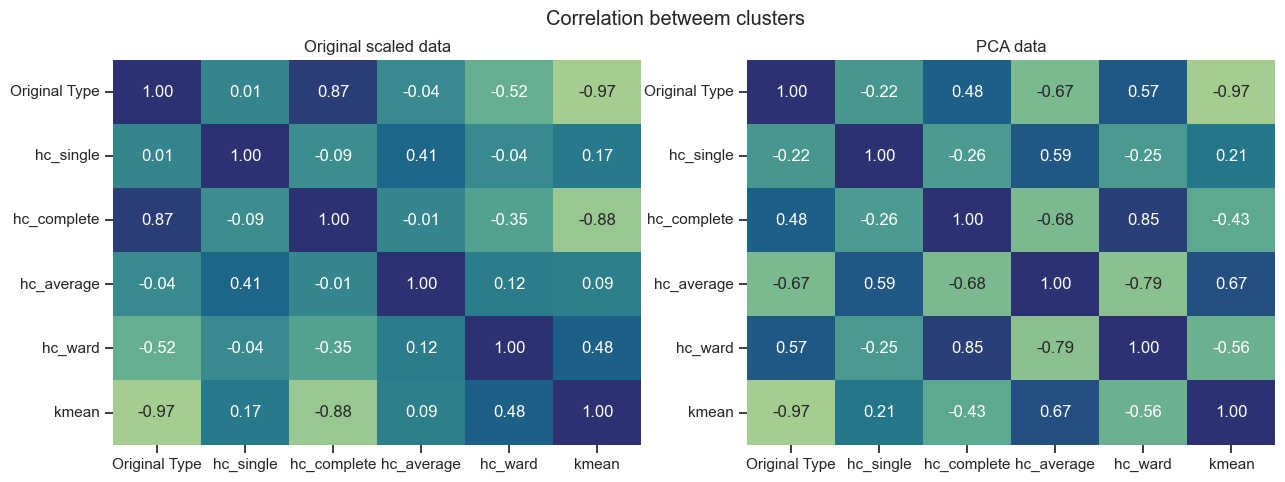

In [79]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax1 = sns.heatmap(results.corr(),annot=True,fmt='.2f',cbar=False,cmap='crest')
ax1.set_title('Original scaled data')
plt.subplot(1,2,2)
ax2 = sns.heatmap(results_pca.corr(),annot=True,fmt='.2f',cbar=False,cmap='crest')
ax2.set_title('PCA data')
plt.suptitle('Correlation betweem clusters')

We can clearly see from heatmap above,\
**kmeans clustering algorithm has most successfully predicted type of each record, matching 97% with original type in both cases.**\
By doing PCA of our data, we see improvements in score of Hierarchical clustering with ward, average and single linkage.

we will summarize performance of other models in barplot below

<Axes: >

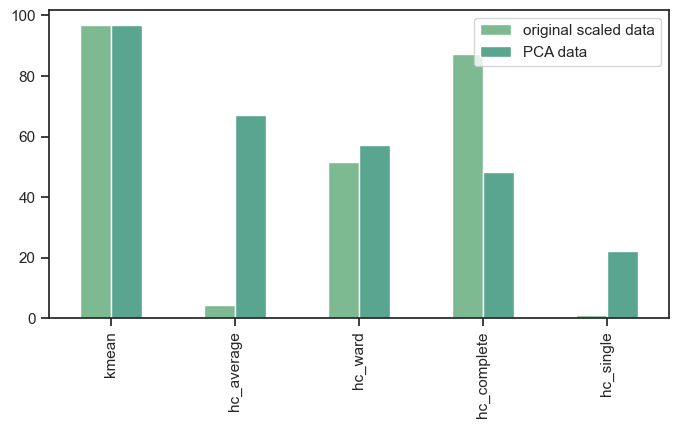

In [85]:
from scipy.stats import pearsonr

vars = ['hc_single','hc_complete','hc_average','hc_ward','kmean']
df = pd.DataFrame({'original scaled data':[np.abs(np.round(pearsonr(results['Original Type'],results[var])[0]*100,2)) for var in vars],
                   'PCA data':[np.abs(np.round(pearsonr(results_pca['Original Type'],results_pca[var])[0]*100,2)) for var in vars]},
                   index=vars)

df.sort_values('PCA data',ascending=False).plot(kind='bar',figsize=(8,4))